<a href="https://colab.research.google.com/github/ankamsrihitha/IPL-Win-Probability-Predictor/blob/main/Copy_of_Deep_Learning_for_Traffic_Sign_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<strong>
    <h1 align='center'>Classify Traffic Signs Using Deep Learning for Self-Driving Cars</h1>
</strong>

---



- Task 1: Project Overview
- Task 2: Import Libraries and datasets
- Task 3: Perform image visualization
- Task 4: Convert images to gray-scale and perform normalization
- Task 5: Understand the theory and intuition behind Convolutional Neural Networks
- Task 6: Build a deep convolutional network model using Keras
- Task 7: Compile and train deep convolutional network model
- Task 8: Assess trained model performance

## __Task 1:__ Project Overview


<p align='center'>
  <a href="#"><img src='https://raw.githubusercontent.com/mohd-faizy/01P_Project_Deep_Learning_for_Traffic_Sign_Classification/master/Proj_png/01.png' height='400' width='900'></a>
</p>

<p align='center'>
  <a href="#"><img src='https://raw.githubusercontent.com/mohd-faizy/01P_Project_Deep_Learning_for_Traffic_Sign_Classification/master/Proj_png/02.png' height='400' width='900'></a>
</p>

## __Task 2:__ Importing Libraries/Datasets

In [ ]:
! wget https://www.dropbox.com/s/v2r77l4wgfkrb1r/traffic_signs_data.zip

--2025-07-27 12:05:59--  https://www.dropbox.com/s/v2r77l4wgfkrb1r/traffic_signs_data.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/ibuax6kya537ofspf4a1k/traffic_signs_data.zip?rlkey=67mz7ku45mpqky178na4pxzix [following]
--2025-07-27 12:05:59--  https://www.dropbox.com/scl/fi/ibuax6kya537ofspf4a1k/traffic_signs_data.zip?rlkey=67mz7ku45mpqky178na4pxzix
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc614acb65486a40c7be6db40359.dl.dropboxusercontent.com/cd/0/inline/CuSghc6t6hBZauhsyyRDhSVtX6wsM2Qz-stET7Yx6ZIbnHezPTuUHzrlcyzA1oIX91tWHg3cFJ8ISULRGto1SbANymm-6kWia9WVweeU5egwCQUYf8nHPip9ORx7HHQny6TfpgleKBIC-oZgoZRRxSn6/file# [following]
--2025-07-27 12:05:59--  https://uc614acb65486a40c7be6db40359.dl.dro

In [ ]:
ls

sample_data/  traffic_signs_data.zip


In [ ]:
! unzip -uq '/content/traffic_signs_data.zip' -d '/content'

In [ ]:
ls

sample_data/  test.p  traffic_signs_data.zip  train.p  valid.p


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import random

print(tf.__version__)

2.18.0


<p align='center'>
  <a href="#"><img src='https://raw.githubusercontent.com/mohd-faizy/01P_Project_Deep_Learning_for_Traffic_Sign_Classification/master/Proj_png/03.png' height='400' width='900'>
</a>
</p>

In [ ]:
with open("/content/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [ ]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [ ]:
# Convert RGB images to grayscale
X_train_gray = np.sum(X_train / 3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test / 3, axis=3, keepdims=True)
X_validation_gray = np.sum(X_validation / 3, axis=3, keepdims=True)

# Normalize the grayscale images
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128
X_validation_gray_norm = (X_validation_gray - 128) / 128

In [ ]:
# 1. Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 2. Normalize data (assuming you already loaded X_train_gray, X_test_gray, X_validation_gray)
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128
X_validation_gray_norm = (X_validation_gray - 128) / 128

# 3. Create the CNN model
model = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D(),
    Conv2D(16, (5, 5), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(43, activation='softmax')
])

# 4. Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. Set up data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    brightness_range=[0.8, 1.2],
    horizontal_flip=False  # Don't flip signs
)


# 6. Fit the data generator to the training data
datagen.fit(X_train_gray_norm)

# 7. Train the model using the augmented data
batch_size = 500

history = model.fit(
    datagen.flow(X_train_gray_norm, y_train, batch_size=batch_size),
    steps_per_epoch=X_train_gray_norm.shape[0] // batch_size,
    epochs=50,
    validation_data=(X_validation_gray_norm, y_validation),
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 20s 257ms/step - accuracy: 0.0923 - loss: 3.5046 - val_accuracy: 0.2213 - val_loss: 3.0253
Epoch 2/50
 1/69 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2240 - loss: 2.8968

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2240 - loss: 2.8968 - val_accuracy: 0.2274 - val_loss: 2.9962
Epoch 3/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 227ms/step - accuracy: 0.3352 - loss: 2.5192 - val_accuracy: 0.5349 - val_loss: 1.6516
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5620 - loss: 1.5762 - val_accuracy: 0.5145 - val_loss: 1.6341
Epoch 5/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 228ms/step - accuracy: 0.5790 - loss: 1.4803 - val_accuracy: 0.6694 - val_loss: 1.1610
Epoch 6/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6840 - loss: 1.1255 - val_accuracy: 0.6769 - val_loss: 1.1604
Epoch 7/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 17s 253ms/step - accuracy: 0.6845 - loss: 1.1173 - val_accuracy: 0.7390 - val_loss: 0.9450
Epoch 8/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7640 - loss: 0.8975 - val_accuracy: 0.7478 - val_loss: 0.9211
Epoch 9/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 229ms/step - accuracy: 0.7456 - loss: 0.9010 - val_accuracy: 0.7807 - val_loss

In [ ]:
i = 0  # or any number from 0 to len(X_train_gray_norm) - 1

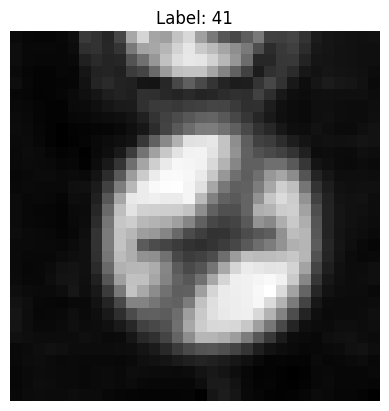

In [ ]:
img = X_train_gray_norm[i].squeeze() * 128 + 128
plt.imshow(img, cmap='gray', interpolation='nearest')
plt.title(f"Label: {y_train[i]}")
plt.axis('off')
plt.show()

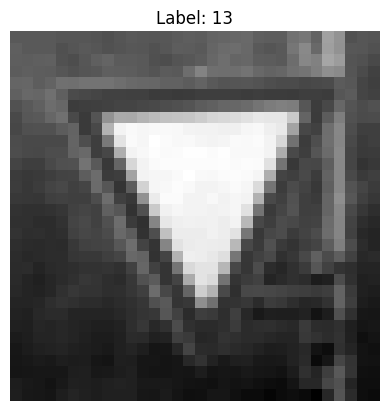

In [ ]:
i = random.randint(0, len(X_train_gray_norm))
img = X_train_gray_norm[i].squeeze() * 128 + 128  # Un-normalize
plt.imshow(img, cmap='gray', interpolation='nearest')  # Prevent smoothing
plt.title(f"Label: {y_train[i]}")
plt.axis('off')
plt.show()

In [ ]:
X_train.shape

(34799, 32, 32, 3)

In [ ]:
y_train.shape

(34799,)

## __Task 3:__ Perform Images Visualization

np.uint8(12)

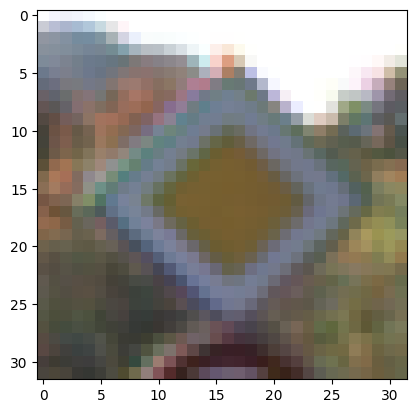

In [ ]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

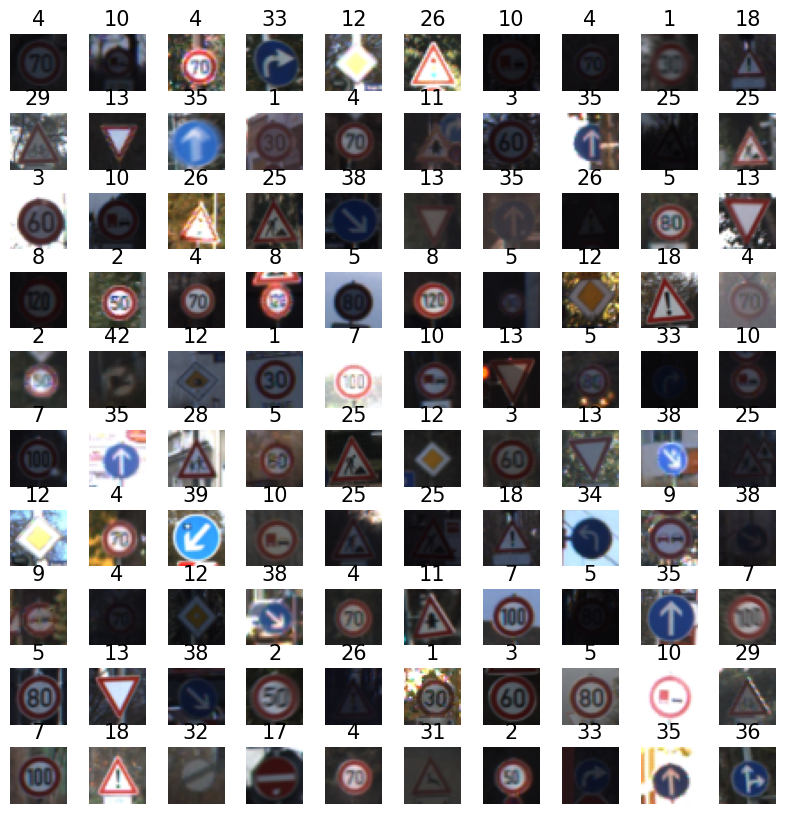

In [ ]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

## __Task 4:__ Convert Images to grayscale and Perform Normalization

In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [ ]:
X_train_gray.shape


(34799, 32, 32, 1)

In [ ]:
X_test_gray.shape


(12630, 32, 32, 1)

In [ ]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [ ]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [ ]:
X_train_gray_norm

array([[[[ 0.96614583],
         [ 0.98697917],
         [ 0.9921875 ],
         ...,
         [ 0.07291667],
         [ 0.64583333],
         [ 0.9609375 ]],

        [[ 0.4375    ],
         [ 0.76822917],
         [ 0.95833333],
         ...,
         [-0.19010417],
         [ 0.22135417],
         [ 0.3515625 ]],

        [[-0.08333333],
         [ 0.234375  ],
         [ 0.5       ],
         ...,
         [-0.13802083],
         [-0.06510417],
         [-0.14583333]],

        ...,

        [[ 0.        ],
         [ 0.7109375 ],
         [ 0.90364583],
         ...,
         [-0.44010417],
         [-0.1953125 ],
         [-0.21875   ]],

        [[-0.38020833],
         [ 0.05208333],
         [-0.0546875 ],
         ...,
         [-0.45833333],
         [-0.30208333],
         [-0.34895833]],

        [[-0.4296875 ],
         [-0.515625  ],
         [-0.6640625 ],
         ...,
         [-0.5234375 ],
         [-0.61458333],
         [-0.640625  ]]],


       [[[ 0.9921875 ],


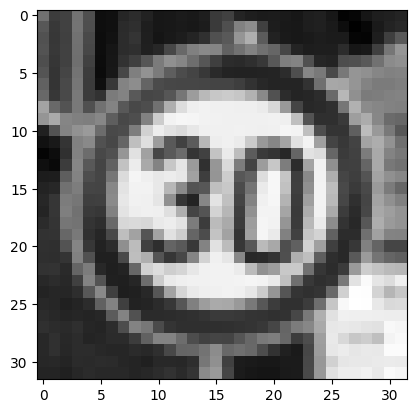

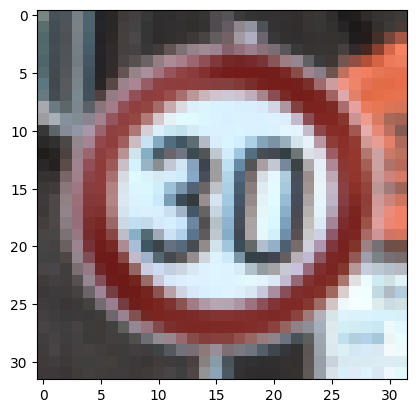

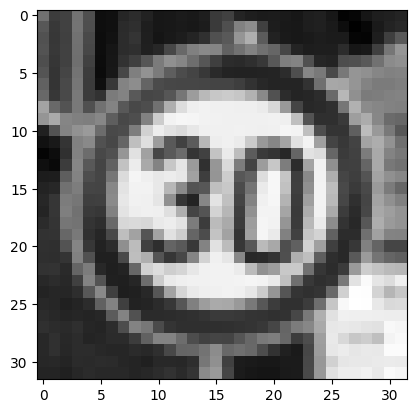

In [ ]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

## __Task 5:__ Understand the theory and intution brhind Convolution Neural Network

<p align='center'>
  <a href="#"><img src='https://raw.githubusercontent.com/mohd-faizy/01P_Project_Deep_Learning_for_Traffic_Sign_Classification/master/Proj_png/04.png' height='400' width='900'>
</a>
</p>

<p align='center'>
  <a href="#"><img src='https://raw.githubusercontent.com/mohd-faizy/01P_Project_Deep_Learning_for_Traffic_Sign_Classification/master/Proj_png/05.png' height='400' width='900'></a>
</p>


## __Task 6:__ Build Deep Convolution Neural Network Model

In [ ]:
from tensorflow.keras import layers, models

def build_lenet_plus(num_classes=43, input_shape=(32, 32, 1)):
    model = models.Sequential(name="LeNetPlus")
    model.add(layers.Input(shape=input_shape))


    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))   # 16×16×32
    model.add(layers.Dropout(0.25))


    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))   # 8×8×64
    model.add(layers.Dropout(0.25))


    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.GlobalAveragePooling2D())         # 128‑D vector


    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

model = build_lenet_plus()
model.summary()


Model: "LeNetPlus"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,187 (633.54 KB)

 Trainable params: 161,547 (631.04 KB)

 Non-trainable params: 640 (2.50 KB)

## __Task 7:__ Compile and Train Deep CNN Model

In [ ]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train_gray_norm,
                 y_train,
                 batch_size = 500,
                 epochs = 50,
                 verbose = 1,
                 validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 27s 221ms/step - accuracy: 0.1035 - loss: 3.4488 - val_accuracy: 0.0476 - val_loss: 3.7210
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.3694 - loss: 2.2089 - val_accuracy: 0.0068 - val_loss: 4.0719
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.6166 - loss: 1.2929 - val_accuracy: 0.0068 - val_loss: 7.1604
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.7870 - loss: 0.7246 - val_accuracy: 0.0068 - val_loss: 8.9837
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.8804 - loss: 0.4214 - val_accuracy: 0.0136 - val_loss: 7.3610
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9325 - loss: 0.2492 - val_accuracy: 0.1558 - val_loss: 4.6594
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9577 - loss: 0.1632 - val_accuracy: 0.3227 - val_loss: 3.3223
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9720 - loss: 0.1152 - val_accuracy: 0.6658 -

## __Task 8:__ Assess Trained CNN Model Performance

In [ ]:
score = model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9604 - loss: 0.1751
Test Accuracy: 0.9618368744850159


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_gray_norm, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9604 - loss: 0.1751
Test Accuracy: 96.18%


In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

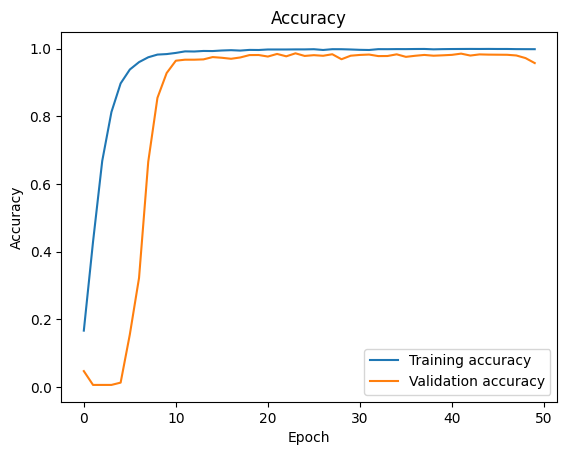

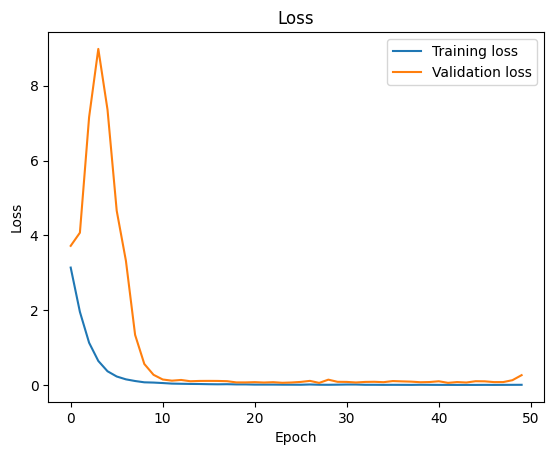

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

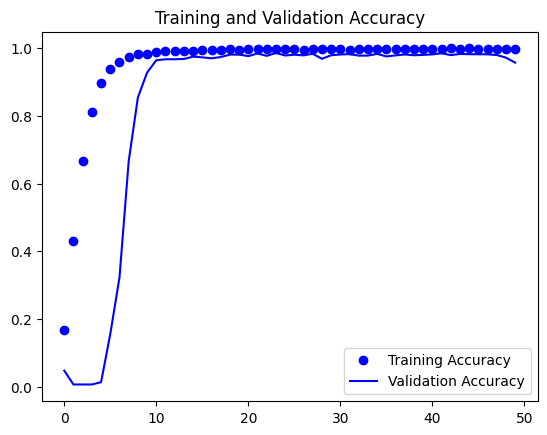

In [ ]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

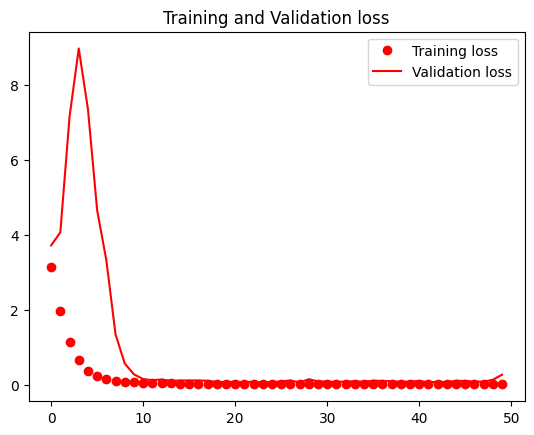

In [ ]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [ ]:
import numpy as np

# Predict class labels
predicted_classes = np.argmax(model.predict(X_test_gray_norm), axis=1)

# Store true labels
y_true=y_test

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


<Axes: >

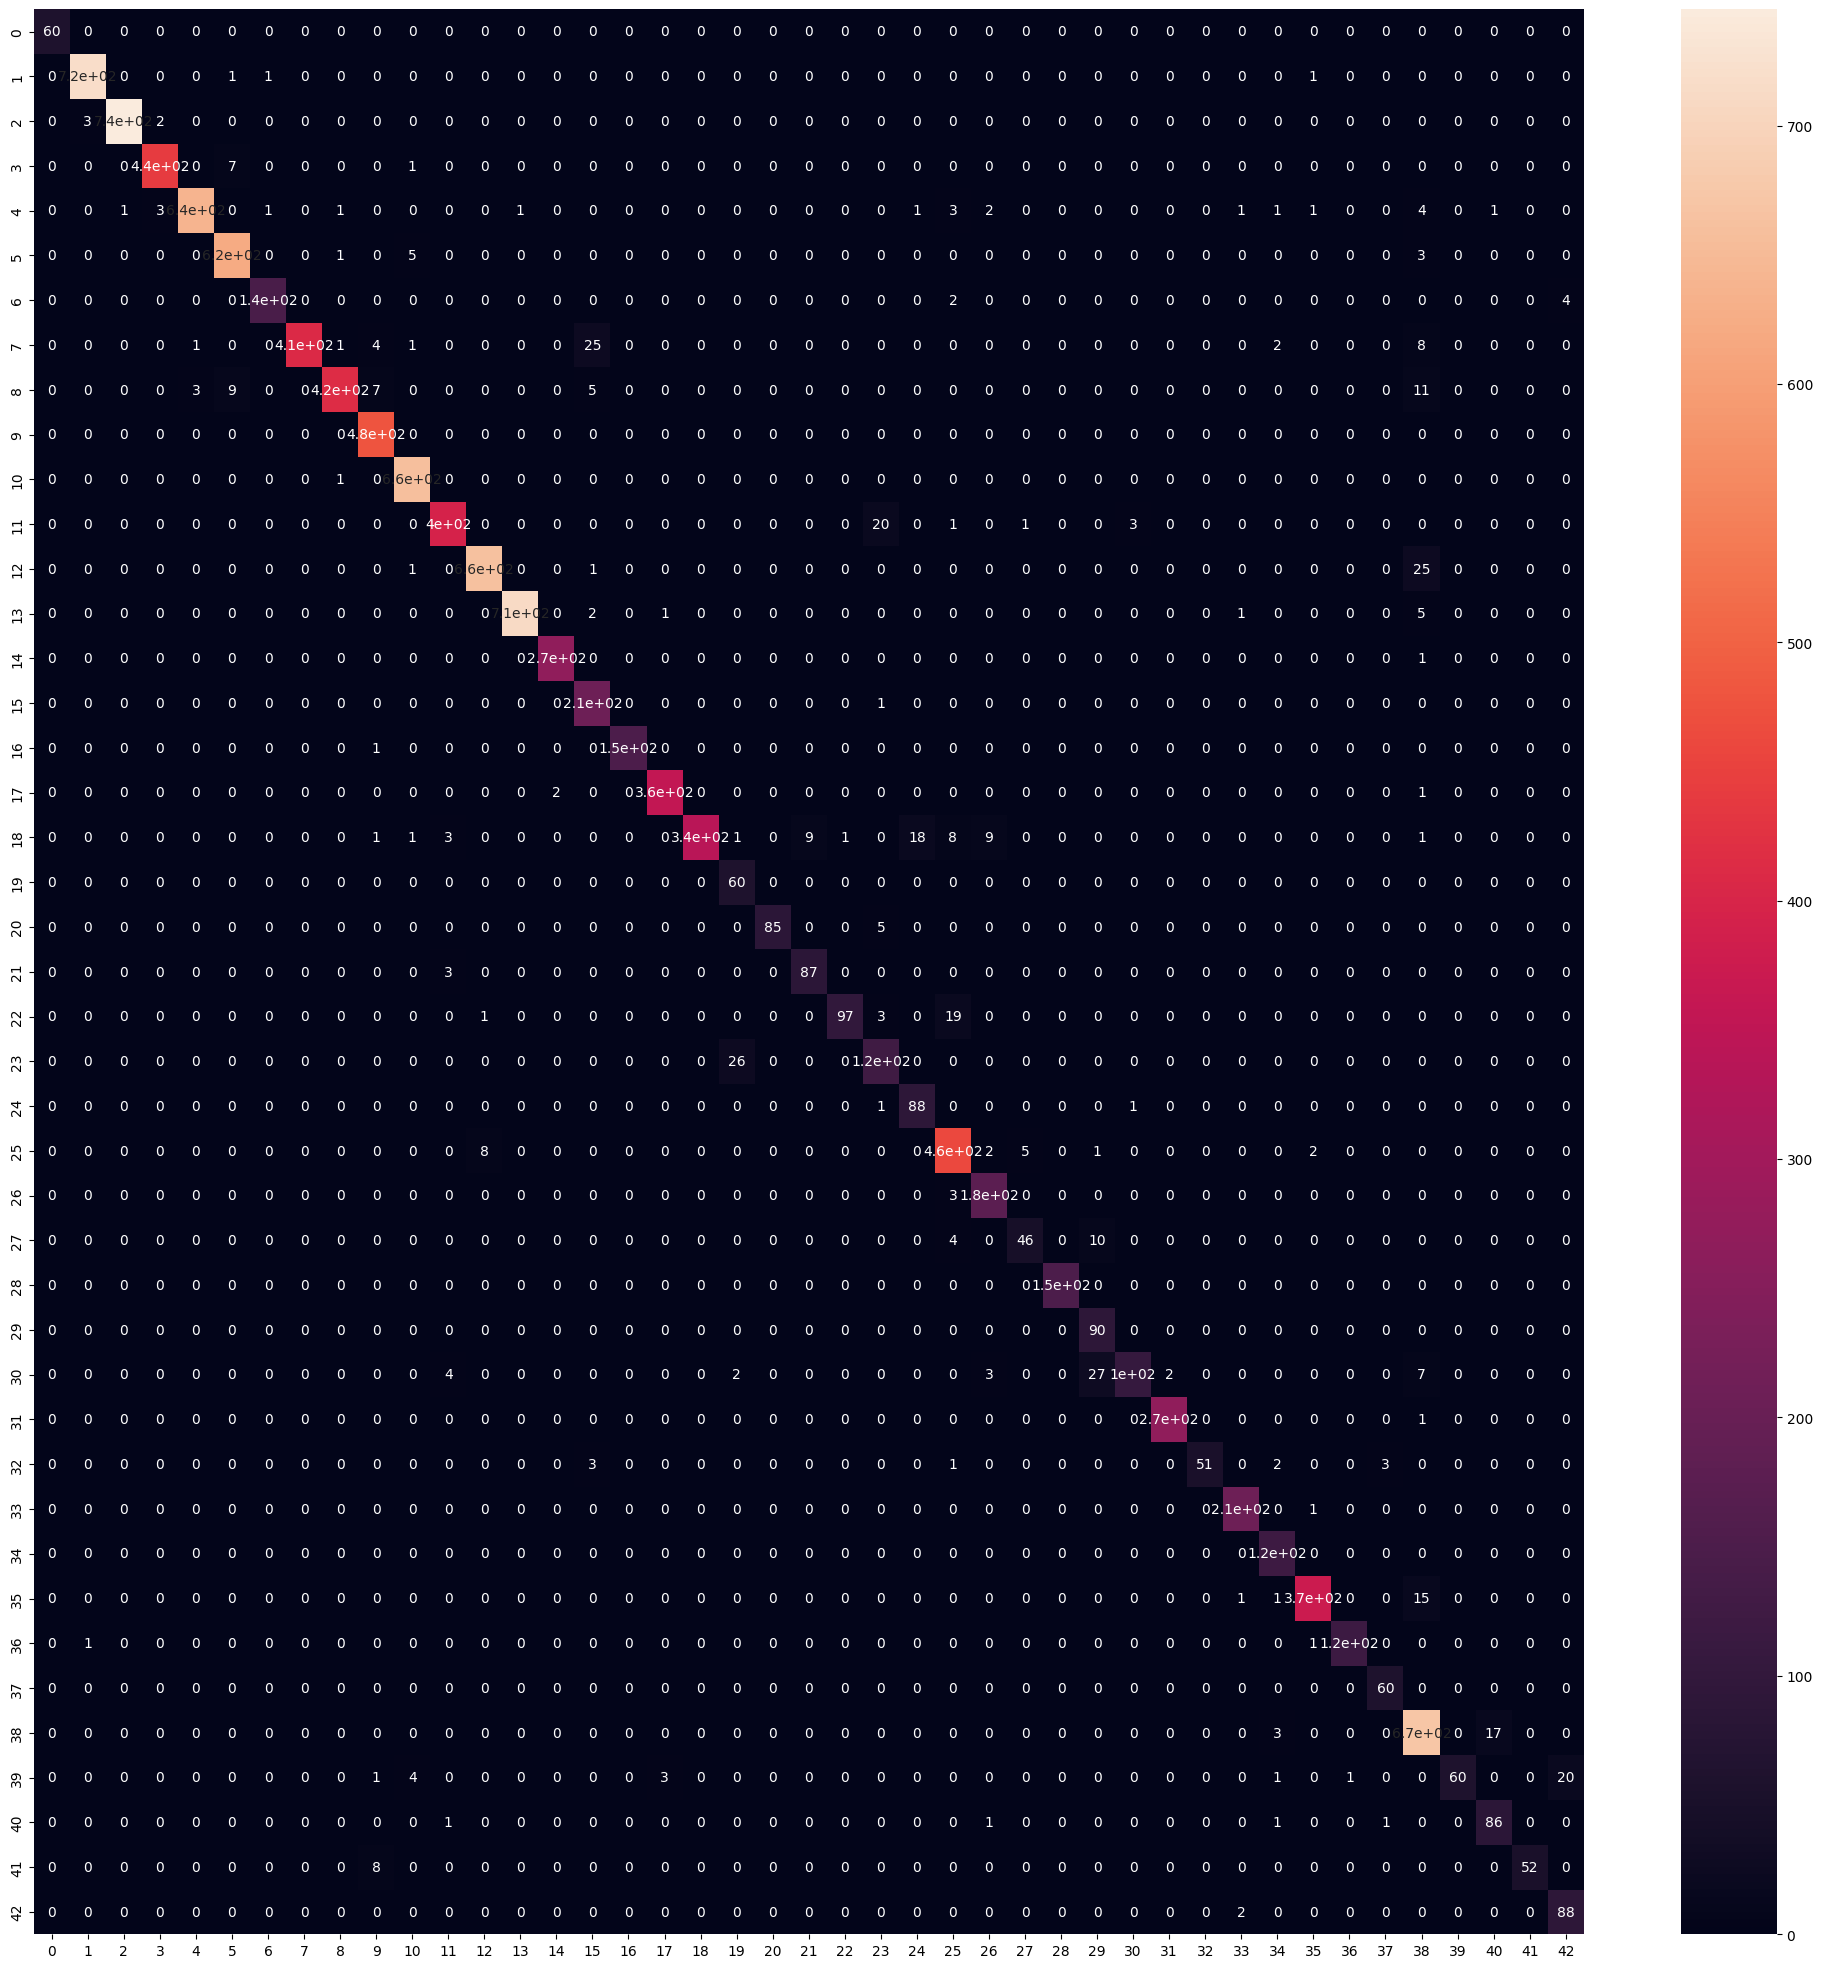

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


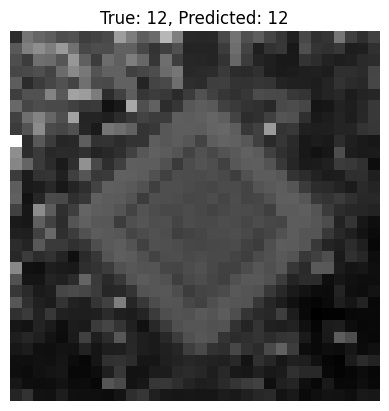

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pick a random image from test set
index = np.random.randint(0, len(X_test_gray_norm))
image = X_test_gray_norm[index]
true_label = y_test[index]

# Model prediction
prediction = model.predict(np.expand_dims(image, axis=0))
predicted_class = np.argmax(prediction)

plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"True: {true_label}, Predicted: {predicted_class}")
plt.axis('off')
plt.show()

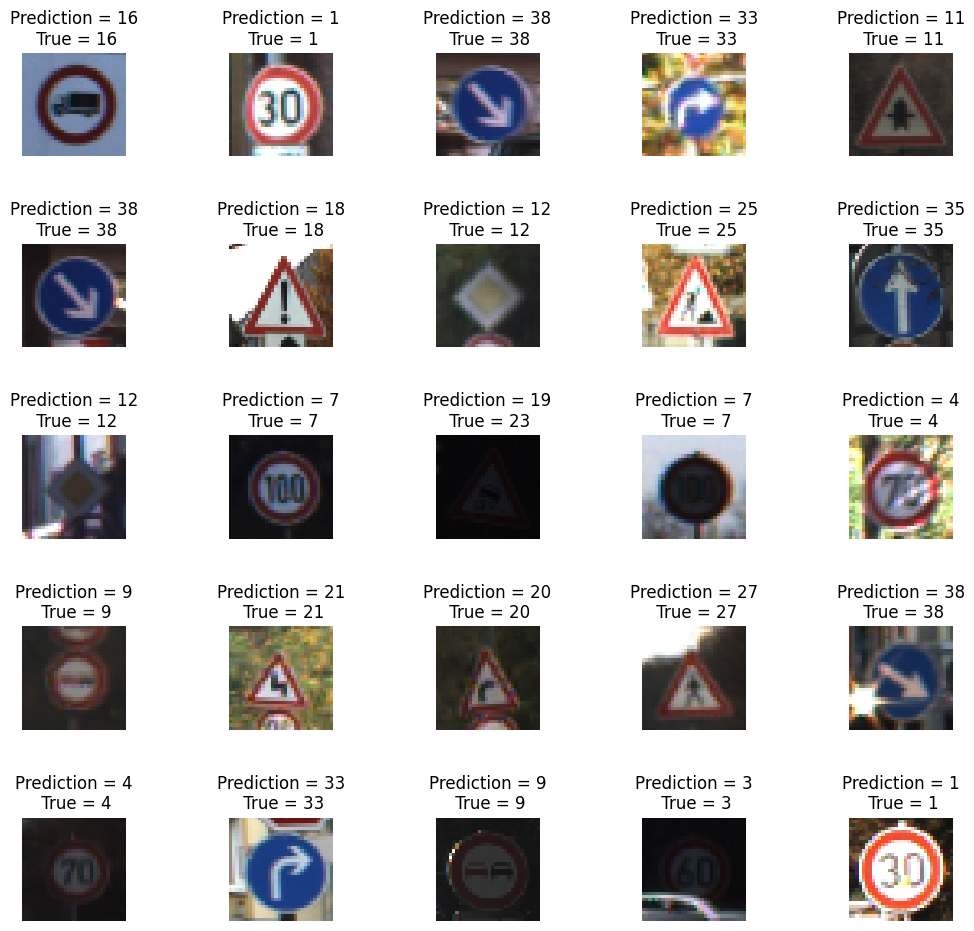

In [ ]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

# __Thats All Folks!__